<a href="https://colab.research.google.com/github/jayuan101/Airbnb-data-mining-and-Predicating-Price/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium # goelogical map
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
listings = pd.read_csv('listings.csv')

In [ ]:
listings

,id,Names,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,SkylitMidtownCastle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,225.0,30.0,48.0,11/4/2019,0.31,3.0,308.0,0.0,NaN
1,5121,BlissArtsSpace,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60.0,30.0,50.0,12/2/2019,0.32,2.0,365.0,0.0,NaN
2,5136,SpaciousBrooklynDuplexPatioGarden,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275.0,21.0,2.0,8/8/2021,0.02,1.0,250.0,1.0,NaN
3,5178,LargeFurnishedRoomNearBway,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68.0,2.0,536.0,5/9/2022,3.37,1.0,172.0,62.0,NaN
4,5203,CozyCleanGuestRoomFamilyApt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75.0,2.0,118.0,7/21/2017,0.76,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,10938202,Spaciousbrightlivingbedroom,2455178,Nessa,Brooklyn,Flatbush,40.63946,-73.96606,Private room,55.0,30.0,6.0,11/14/2016,0.09,1.0,0.0,0.0,NaN
7240,10835801,SpaciousLuxurybdrmonBklynWaterfront,12353168,Ali,Brooklyn,Williamsburg,40.71916,-73.96283,Entire home/apt,225.0,5.0,21.0,5/15/2021,0.39,1.0,0.0,0.0,NaN
7241,11239207,TheBlairHouseRental,33535733,Andrew,Manhattan,Midtown,40.76096,-73.96720,Private room,120.0,30.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN
7242,10939255,MasterBedroomBathroomenSuite,7501803,Hannah,Brooklyn,Flatbush,40.65193,-73.96400,Private room,55.0,30.0,3.0,10/9/2017,0.04,1.0,0.0,0.0,NaN


In [ ]:
listings.columns

Index(['id', 'Names', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7244 entries, 0 to 7243
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7244 non-null   int64  
 1   Names                           7220 non-null   object 
 2   host_id                         7244 non-null   int64  
 3   host_name                       7237 non-null   object 
 4   neighbourhood_group             7244 non-null   object 
 5   neighbourhood                   7244 non-null   object 
 6   latitude                        7244 non-null   float64
 7   longitude                       7244 non-null   float64
 8   room_type                       7244 non-null   object 
 9   price                           7243 non-null   float64
 10  minimum_nights                  7243 non-null   float64
 11  number_of_reviews               7243 non-null   float64
 12  last_review                     60

In [ ]:
listings.isnull().sum()

id                                   0
Names                               24
host_id                              0
host_name                            7
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       1195
reviews_per_month                 1195
calculated_host_listings_count       1
availability_365                     1
number_of_reviews_ltm                1
license                           7244
dtype: int64

In [ ]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
listings.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
listings

,Names,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,SkylitMidtownCastle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,225.0,30.0,48.0,0.31,3.0,308.0,0.0,NaN
1,BlissArtsSpace,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60.0,30.0,50.0,0.32,2.0,365.0,0.0,NaN
2,SpaciousBrooklynDuplexPatioGarden,7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275.0,21.0,2.0,0.02,1.0,250.0,1.0,NaN
3,LargeFurnishedRoomNearBway,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68.0,2.0,536.0,3.37,1.0,172.0,62.0,NaN
4,CozyCleanGuestRoomFamilyApt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75.0,2.0,118.0,0.76,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,Spaciousbrightlivingbedroom,2455178,Brooklyn,Flatbush,40.63946,-73.96606,Private room,55.0,30.0,6.0,0.09,1.0,0.0,0.0,NaN
7240,SpaciousLuxurybdrmonBklynWaterfront,12353168,Brooklyn,Williamsburg,40.71916,-73.96283,Entire home/apt,225.0,5.0,21.0,0.39,1.0,0.0,0.0,NaN
7241,TheBlairHouseRental,33535733,Manhattan,Midtown,40.76096,-73.96720,Private room,120.0,30.0,0.0,NaN,1.0,0.0,0.0,NaN
7242,MasterBedroomBathroomenSuite,7501803,Brooklyn,Flatbush,40.65193,-73.96400,Private room,55.0,30.0,3.0,0.04,1.0,0.0,0.0,NaN


In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0
listings.fillna({'reviews_per_month':4}, inplace=True)
#examing changes
listings.reviews_per_month.isnull().sum()

0

In [ ]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
listings.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
listings.nunique()

Names                             7086
host_id                           6362
neighbourhood_group                  5
neighbourhood                      168
latitude                          5904
longitude                         5134
room_type                            5
price                              473
minimum_nights                      71
number_of_reviews                  397
reviews_per_month                  414
calculated_host_listings_count      29
availability_365                   366
number_of_reviews_ltm               88
license                              0
dtype: int64

In [ ]:
#examining the unique values of room_type as this column will appear very handy for later analysis
listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room',
       'Entire home/ap'], dtype=object)

In [ ]:
listings.groupby('number_of_reviews')['number_of_reviews'].count()

number_of_reviews
0.0      1194
1.0       694
2.0       434
3.0       283
4.0       236
         ... 
591.0       1
595.0       1
605.0       1
670.0       1
674.0       1
Name: number_of_reviews, Length: 397, dtype: int64

In [ ]:
#Pickup location for train dataset
import folium # goelogical map
map_1 = folium.Map(location=[40.7073094 ,-73.933359],tiles='OpenStreetMap',
 zoom_start=12)
for each in listings[:1000].iterrows():
    folium.CircleMarker([each[1]['latitude'],each[1]['longitude']],
                        radius=3,
                        color='blue',
                        popup=str(each[1]['latitude'])+','+str(each[1]['longitude']),
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1



In [ ]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=listings.host_id.value_counts().head(10)
top_host

7503643     29
417504      27
13347167    26
2119276     20
26377263    18
3250450     15
7245581     15
16437254    14
50760546    14
47554473    13
Name: host_id, dtype: int64

In [ ]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=listings.calculated_host_listings_count.max()
top_host_check

189.0

In [ ]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=listings.calculated_host_listings_count.min()
top_host_check

1.0

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,7503643,29
1,417504,27
2,13347167,26
3,2119276,20
4,26377263,18
5,3250450,15
6,7245581,15
7,16437254,14
8,50760546,14
9,47554473,13


[Text(0, 0, '417504'),
 Text(0, 0, '2119276'),
 Text(0, 0, '3250450'),
 Text(0, 0, '7245581'),
 Text(0, 0, '7503643'),
 Text(0, 0, '13347167'),
 Text(0, 0, '16437254'),
 Text(0, 0, '26377263'),
 Text(0, 0, '47554473'),
 Text(0, 0, '50760546')]

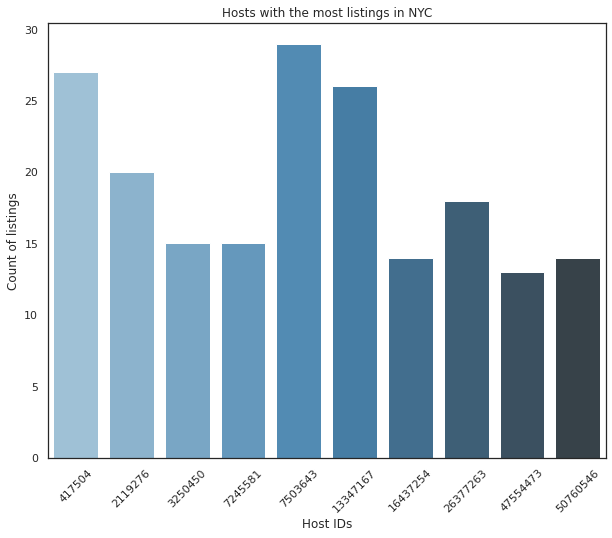

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [ ]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=listings.loc[listings['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=listings.loc[listings['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=listings.loc[listings['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=listings.loc[listings['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=listings.loc[listings['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [ ]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,10.0,24.0,25.0,40.0,25.0
25%,70.0,97.0,60.0,65.0,50.5
50%,105.0,149.0,85.0,78.0,77.5
75%,165.0,202.5,125.0,120.5,110.0
max,6500.0,9999.0,1393.0,460.0,680.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

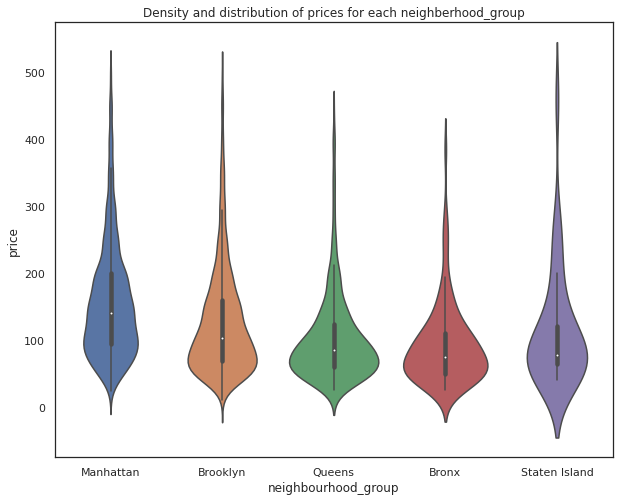

In [ ]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=listings[listings.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [ ]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
listings.neighbourhood.value_counts().head(10)

Williamsburg          622
Bedford-Stuyvesant    536
Harlem                490
Upper West Side       358
East Village          352
Upper East Side       285
Bushwick              262
Crown Heights         248
Greenpoint            233
Hell's Kitchen        218
Name: neighbourhood, dtype: int64

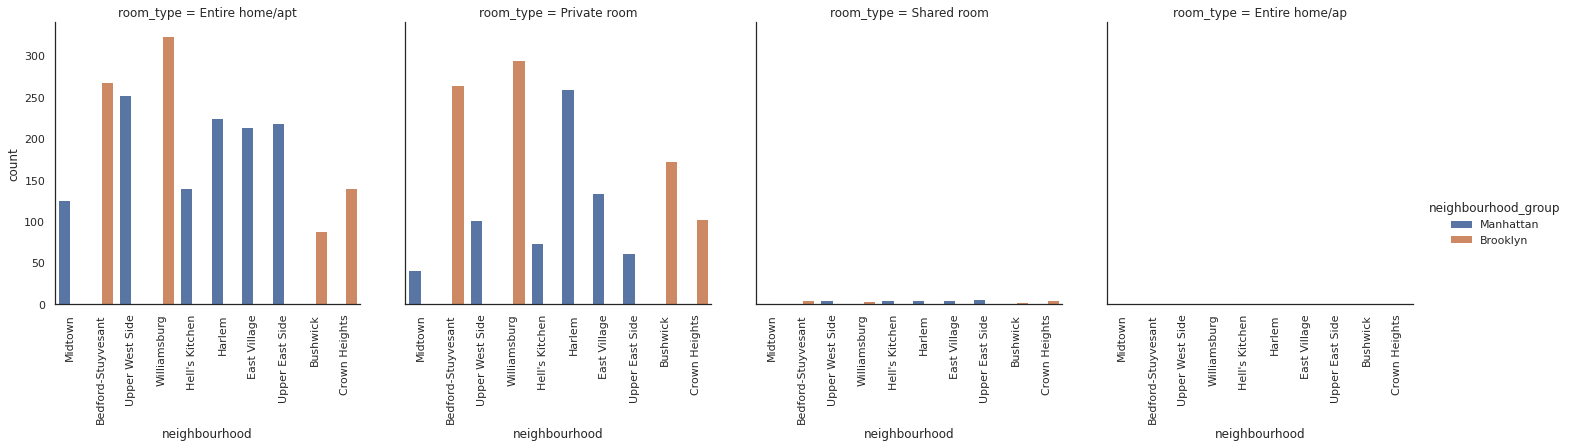

In [ ]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=listings.loc[listings['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

In [ ]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=listings.nlargest(10,'number_of_reviews')
top_reviewed_listings

,Names,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2676,WilliamsburgPenthouseGuestroom,6642777,Brooklyn,Williamsburg,40.71067,-73.95250,Private room,110.0,1.0,674.0,7.08,2.0,82.0,114.0,NaN
1244,WilliamsburgPenthouseHideaway,6642777,Brooklyn,Williamsburg,40.71165,-73.95236,Private room,103.0,1.0,670.0,6.13,2.0,81.0,124.0,NaN
108,PrivateRoomonHistoricSugarHill,277379,Manhattan,Harlem,40.82380,-73.94444,Private room,60.0,1.0,605.0,4.47,2.0,178.0,57.0,NaN
1089,EastVillageGayFriendlyDblRoom,5074654,Manhattan,East Village,40.73024,-73.98147,Private room,100.0,1.0,595.0,5.30,1.0,200.0,100.0,NaN
526,PrivateRoominSpaciousQuietAptElevatorBldg,277379,Manhattan,Harlem,40.82390,-73.94242,Private room,60.0,1.0,591.0,4.88,2.0,151.0,75.0,NaN
5288,CouplesLuxurysuite,42243297,Brooklyn,Bensonhurst,40.61114,-74.00639,Private room,129.0,1.0,579.0,7.76,2.0,337.0,89.0,NaN
3940,SpaciousRoominEastVillageArchitectsHome,7256281,Manhattan,East Village,40.72737,-73.98936,Private room,168.0,1.0,573.0,6.60,1.0,139.0,75.0,NaN
709,MyLittleGuestRoominFlushing,2680820,Queens,Flushing,40.75485,-73.81795,Private room,65.0,2.0,561.0,4.63,2.0,310.0,44.0,NaN
2288,NearTimesSquareandHellsKitchen,14380456,Manhattan,Theater District,40.75864,-73.98824,Private room,120.0,2.0,552.0,5.62,1.0,186.0,63.0,NaN
3,LargeFurnishedRoomNearBway,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68.0,2.0,536.0,3.37,1.0,172.0,62.0,NaN


In [ ]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 98.3


In [ ]:
listings['room_type'].value_counts()

Entire home/apt    4230
Private room       2924
Shared room          83
Hotel room            6
Entire home/ap        1
Name: room_type, dtype: int64

In [ ]:
def reduce_mem_usage(listings):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = listings.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in listings.columns:
        col_type = prices[col].dtype
        
        if col_type != object:
            c_min = listings[col].min()
            c_max = listings[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    listings[col] = listings[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    listings[col] = listings[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    listings[col] = listings[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    listings[col] = listings[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    listings[col] = listings[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    listings[col] = listings[col].astype(np.float32)
                else:
                    listings[col] = listings[col].astype(np.float64)
        else:
            listings[col] = listings[col].astype('object')

    end_mem = listings.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return listings

In [ ]:
features = listings[['Names', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license']]

print('Number of features: ', len(features.columns))

Number of features:  14


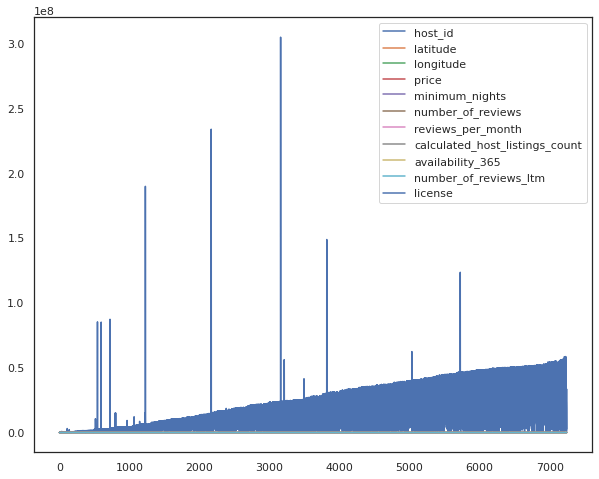

In [ ]:
listings.plot()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# generate dataset
X, y = make_classification(n_samples=10000, n_features=14, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

In [ ]:
from sklearn.ensemble import BaggingClassifier
# define model
model = BaggingClassifier()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import  cross_val_score
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
# bagged decision trees on an imbalanced classification problem
from numpy import mean
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.890


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (8000, 14)
X_test shape:  (2000, 14)
y_train shape:  (8000,)
y_test shape:  (2000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report
#print classification report for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1978
           1       0.75      0.41      0.53        22

    accuracy                           0.99      2000
   macro avg       0.87      0.70      0.76      2000
weighted avg       0.99      0.99      0.99      2000



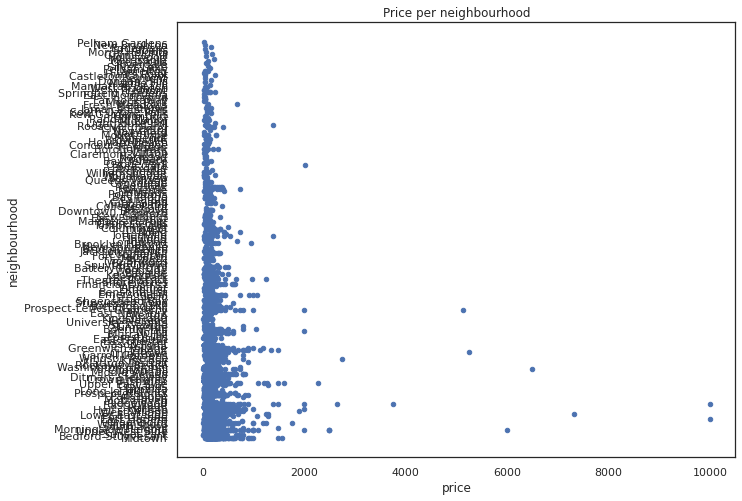

In [ ]:
listings.plot.scatter(x='price', y='neighbourhood', title='Price per neighbourhood');

In [ ]:
print(listings.corr())

                                 host_id  latitude  longitude     price  \
host_id                         1.000000  0.047768   0.064957 -0.052008   
latitude                        0.047768  1.000000   0.124383  0.022811   
longitude                       0.064957  0.124383   1.000000 -0.122567   
price                          -0.052008  0.022811  -0.122567  1.000000   
minimum_nights                  0.001340  0.042430  -0.066885  0.021095   
number_of_reviews              -0.077706 -0.043931   0.091025 -0.017332   
reviews_per_month               0.116987  0.018018   0.013061  0.029804   
calculated_host_listings_count  0.046387  0.029580   0.025370  0.000751   
availability_365               -0.088286 -0.023925   0.174822  0.048279   
number_of_reviews_ltm          -0.023543 -0.043552   0.056668  0.006417   
license                              NaN       NaN        NaN       NaN   

                                minimum_nights  number_of_reviews  \
host_id                       

In [ ]:
print(listings.describe())

            host_id     latitude    longitude        price  minimum_nights  \
count  7.244000e+03  7244.000000  7244.000000  7243.000000     7243.000000   
mean   1.604804e+07    40.729841   -73.957874   166.380229       26.039486   
std    1.637255e+07     0.052852     0.037901   283.111828       35.697819   
min    2.571000e+03    40.508630   -74.241350    10.000000        1.000000   
25%    2.966450e+06    40.688767   -73.983270    76.000000        7.000000   
50%    1.026437e+07    40.724200   -73.958255   120.000000       30.000000   
75%    2.486176e+07    40.764763   -73.942653   185.000000       30.000000   
max    3.043856e+08    40.897110   -73.712990  9999.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count        7243.000000        7244.000000                     7243.000000   
mean           45.620047           1.162780                        2.617286   
std            78.553259           1.504365                 

In [ ]:
#count unique values for each column
[(col, listings[col].nunique()) for col in listings.columns]

[('Names', 7086),
 ('host_id', 6362),
 ('neighbourhood_group', 5),
 ('neighbourhood', 168),
 ('latitude', 5904),
 ('longitude', 5134),
 ('room_type', 5),
 ('price', 473),
 ('minimum_nights', 71),
 ('number_of_reviews', 397),
 ('reviews_per_month', 414),
 ('calculated_host_listings_count', 29),
 ('availability_365', 366),
 ('number_of_reviews_ltm', 88),
 ('license', 0)]

In [ ]:
listings["price"] = listings["price"].apply(lambda x: 1 if x < 1 else x) #Make 0's 1 so the log function works

In [ ]:
#convert column to string and lowercase all words 
listings.Names = listings.Names.astype(str)
listings.Names = listings.Names.str.lower()
listings.Names

0                       skylitmidtowncastle
1                            blissartsspace
2         spaciousbrooklynduplexpatiogarden
3                largefurnishedroomnearbway
4               cozycleanguestroomfamilyapt
                       ...                 
7239            spaciousbrightlivingbedroom
7240    spaciousluxurybdrmonbklynwaterfront
7241                    theblairhouserental
7242           masterbedroombathroomensuite
7243                hugesunnybedtimessquare
Name: Names, Length: 7244, dtype: object

In [ ]:
#Print some attributes about the prices
print("Max Price: ", np.max(listings["price"]))
print("Min Price: ", np.min(listings["price"]))
print("Num Prices Below 20: ", len(listings.loc[listings["price"] < 20]))
print("Num Prices Above 1000: ", len(listings.loc[listings["price"] > 1000]))
print("Num Locations", len(listings))

Max Price:  9999.0
Min Price:  10.0
Num Prices Below 20:  3
Num Prices Above 1000:  50
Num Locations 7244


In [ ]:
print(listings.isnull().any()) #Check for null values

Names                             False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                              True
minimum_nights                     True
number_of_reviews                  True
reviews_per_month                 False
calculated_host_listings_count     True
availability_365                   True
number_of_reviews_ltm              True
license                            True
dtype: bool


In [ ]:
import folium
import folium.plugins as plugins

latitude2020 = listings["latitude"].tolist()
longitude2020 = listings["longitude"].tolist()
locations = list(zip(latitude2020, longitude2020))

# Initialize the map:
usa_map = folium.Map(location = [35, -100], zoom_start = 5)
plugins.FastMarkerCluster(data = locations).add_to(usa_map)
usa_map

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 150, random_state = 42)
regressor.fit(X_train, y_train)  
print("Forest Accuracy: ", regressor.score(X_train, y_train))

Forest Accuracy:  0.9483068176832378


In [ ]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.005770216288119714
0.07596193973378848


In [ ]:
## Define Grid 
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.008
Mean Squared Error: 0.008
Root Mean Squared Error: 0.08944271909999159


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1975    3]
 [  13    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1978
           1       0.75      0.41      0.53        22

    accuracy                           0.99      2000
   macro avg       0.87      0.70      0.76      2000
weighted avg       0.99      0.99      0.99      2000

0.992
